# Принятие решений в бизнесе

В рамках данного проекта, мы сотрудничаем с отделом маркетинга крупного интернет-магазина с целью увеличения выручки. Совместными усилиями мы подготовили список гипотез, предполагая потенциальные изменения, способные положительно сказаться на эффективности работы платформы.

Далее, мы приступили к этапу приоритизации этих гипотез, используя методы ICE и RICE, чтобы выявить те, которые обещают наибольший потенциал для улучшения показателей. Затем, с целью проверки и подтверждения эффективности выбранных изменений, был запущен A/B-тест.

В данном контексте, наша цель - анализировать результаты тестирования.

Наши исследования будут базироваться на наборах данных, которые включают в себя информацию о:

1. гипотезах (9 гипотез с оценкой Reach, Impact, Confidence и Efforts)
2. заказах (1197 строк по столбцам с id заказа, id пользователя, датой и стоимостью заказа, а также с распределением по группе А или В)
3. пользователях (62 строки с датой, группой и количеством пользователей, входящих в нее)

## План работы

**Часть 1. Приоритизация гипотез**
1. Загрузка данных и ознакомление с ними
2. Применение фреймворка ICE для приоритизации гипотез
3. Применение фреймворка RICE для приоритизации гипотез
4. Сравнение результатов приоритизации по ICE и RICE, объяснение изменений

**Часть 2. Анализ A/B-теста**
1. Загрузка данных о заказах и посетителях
2. Подготовка данных: создание кумулятивных метрик
3. Построение графика кумулятивной выручки по группам и анализ
4. Построение графика кумулятивного среднего чека по группам и анализ
5. Построение графика относительного изменения кумулятивного среднего чека группы B к группе A и анализ
6. Построение графика кумулятивного среднего количества заказов на посетителя по группам и анализ
7. Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A и анализ
8. Построение точечного графика количества заказов по пользователям и анализ
9. Расчет 95-го и 99-го перцентилей количества заказов на пользователя и выбор границы аномалий
10. Построение точечного графика стоимостей заказов и анализ
11. Расчет 95-го и 99-го перцентилей стоимостей заказов и выбор границы аномалий
12. Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по "сырым" данным и анализ
13. Расчет статистической значимости различий в среднем чеке заказа между группами по "сырым" данным и анализ
14. Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по "очищенным" данным и анализ
15. Расчет статистической значимости различий в среднем чеке заказа между группами по "очищенным" данным и анализ
16. Принятие решения по результатам теста

На основе этого плана мы приступим к приоритизации гипотез и анализу результатов А/В-теста.

In [ ]:
# импортируем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# установим показ всей информации без обрезания
pd.set_option('display.max_columns', None)

## Приоритизация гипотез.

In [ ]:
pd.set_option("max_colwidth", 999)
hyp_data = pd.read_csv('/datasets/hypothesis.csv')
hyp_data.info()
hyp_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Визуальная проверка показала, что пропусков, аномалий в данных первого датасета нет.

In [ ]:
# приоритезируем гипотезы методом ICE
hyp_data['ICE'] = hyp_data['Impact'] * hyp_data['Confidence'] / hyp_data['Efforts']
hyp_data['ICE'] = hyp_data['ICE'].round(3)
hyp_data['ICE'].sort_values(ascending=False)

8    16.200
0    13.333
7    11.200
6     8.000
2     7.000
1     2.000
5     1.333
3     1.125
4     1.000
Name: ICE, dtype: float64

In [ ]:
# приоритезируем гипотезы методом RICE
hyp_data['RICE'] = hyp_data['Reach'] * hyp_data['Impact'] * hyp_data['Confidence'] / hyp_data['Efforts']
hyp_data['RICE'].sort_values(ascending=False)

7    112.0
2     56.0
0     40.0
6     40.0
8     16.2
3      9.0
1      4.0
5      4.0
4      3.0
Name: RICE, dtype: float64

In [ ]:
hyp_data

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.2


Изменение в приоритизации гипотез произошло из-за того, что методы ICE и RICE учитывают разные аспекты при оценке приоритетности гипотез.

Метод ICE оценивает гипотезы на основе трех параметров: Impact (влияние), Confidence (уверенность) и Effort (усилия). Оценка ICE вычисляется по формуле:

ICE = Impact×Confidence / Efforts

Гипотезы с высокими оценками ICE считаются более приоритетными. В данном случае, **гипотезы с индексами 8, 0 и 7 имеют самые высокие оценки ICE**, что означает, что они имеют большое влияние, высокую уверенность и/или малые усилия.

Метод RICE, в отличие от ICE, также учитывает Reach (охват), то есть, скольких пользователей затронет изменение. Формула RICE выглядит так: RICE = Reach×Impact×Confidence / Efforts

Из-за добавления параметра Reach, гипотезы с высоким охватом получают более высокие оценки RICE. В данном случае, **гипотеза с индексом 7 имеет самую высокую оценку RICE**, так как она имеет большой охват пользователей.

Таким образом, приоритизация гипотез изменяется в зависимости от того, какие аспекты важны для проекта в данный момент: если важен охват пользователей, то RICE может быть более информативным, а если более важны уверенность и влияние, то ICE может быть предпочтительнее.

## Анализ A/B-теста

Был проведен A/B-тест и получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

In [ ]:
orders = pd.read_csv('/datasets/orders.csv')
orders.info()
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [ ]:
# приведем названия столбцов к корректному варианту
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

In [ ]:
orders.describe()

,transaction_id,visitor_id,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [ ]:
# проверим на явные дубликаты
orders.duplicated().sum()

0

In [ ]:
# проверим на пропуски
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [ ]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.info()
visitors.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [ ]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [ ]:
# проверим на явные дубликаты
visitors.duplicated().sum()

0

In [ ]:
# проверим на пропуски
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [ ]:
# преобразуем данные по времени
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

В файле по заказам (`orders`) 1197 строк, пропуски и дубликаты отсутствуют. В файле `visitors` с информацией по участникам теста 62 строки, также отсутствуют пропуски и дубликаты. Для дальнейшей работы были изменены названия столбцов, формат даты.

### Построим график куммулятивной выручки по группам

In [ ]:
# проверим есть ли пользователи-дублеры в группах
dupl_users = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())
dupl_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [ ]:
# удалим таких пользователей из таблицы orders
orders = orders[~orders['visitor_id'].isin(dupl_users)]

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'transaction_id' : 'nunique',
    'visitor_id' : 'nunique',
    'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


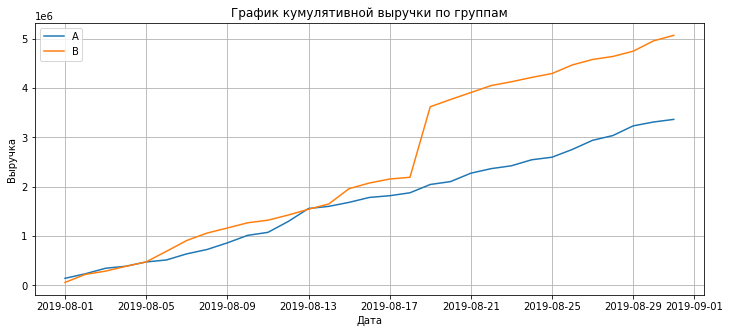

In [ ]:
# построим график
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

# задаем размер
plt.figure(figsize=(12,5))

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# задаем параметры
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend()
plt.show()

Большую выручку показывает группа В, особенно, начиная с 13 августа. Резкий скачок повышения выручки произошел 18 августа.

### Построим график кумулятивного среднего чека по группам

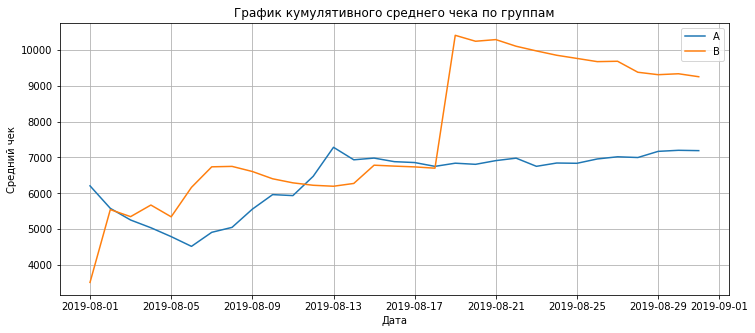

In [ ]:
# задаем размер
plt.figure(figsize=(12,5))

# строим график
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# задаем параметры
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.legend()
plt.show()

До 18 августа график не был стабилен, сначала средний чек группы В был выше, затем группы А, однако 18 числа произошел резкий скачок среднего чека группы В и оставался на более высоком уровне, чем чек группы А.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

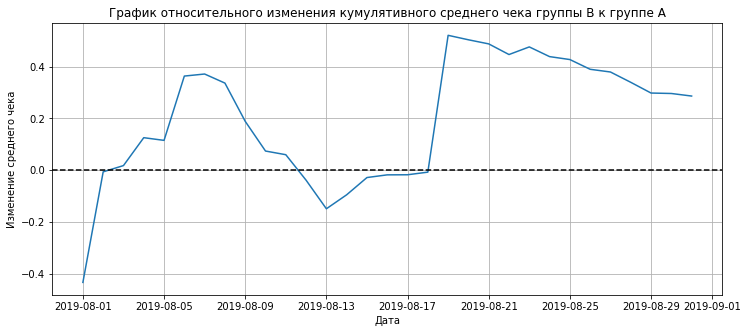

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# задаем размер
plt.figure(figsize=(12,5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

# задаем параметры
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека')
plt.grid()
plt.show()

График относительного изменения кумулятивного среднего чека не стабилен, это вероятно означает, что в данных есть дорогие заказы и выбросы.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

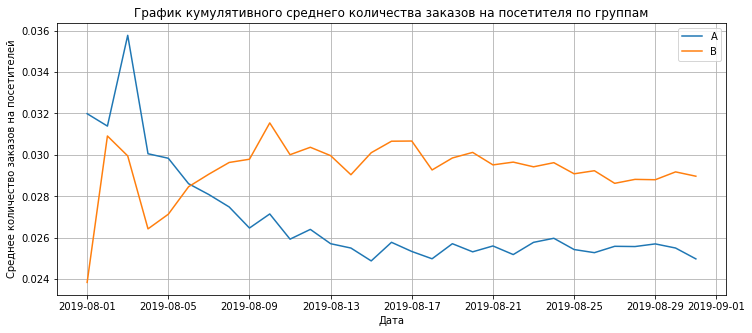

In [ ]:
# задаем размер
plt.figure(figsize=(12,5))

# строим график
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')

# задаем параметры
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителей')
plt.grid()
plt.legend()
plt.show()

До 6 августа среднее количество заказов группы А превышало количество заказов группы В, однако начиная с этого числа ситуация изменилась, и группа В стала лидировать, количество заказов после повышения держалось относительно на одном уровне.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

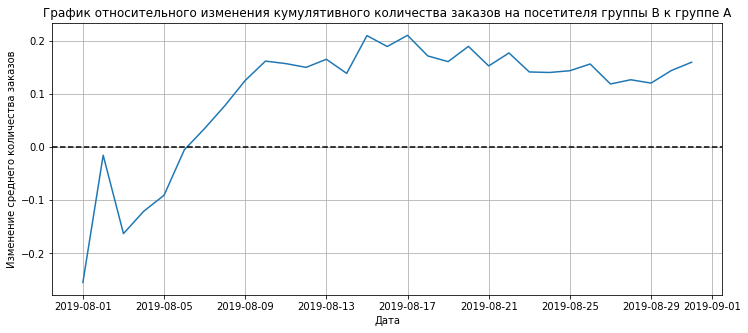

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# задаем размер
plt.figure(figsize=(12,5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

# задаем параметры
plt.title('График относительного изменения кумулятивного количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего количества заказов')
plt.grid()
plt.show()

График также не стабилен, поэтому необходимо узнать, какие выбросы влияют на резкие скачки вверх (после 1 августа) и вниз (после 2 августа).

### Построим точечный график количества заказов по пользователям

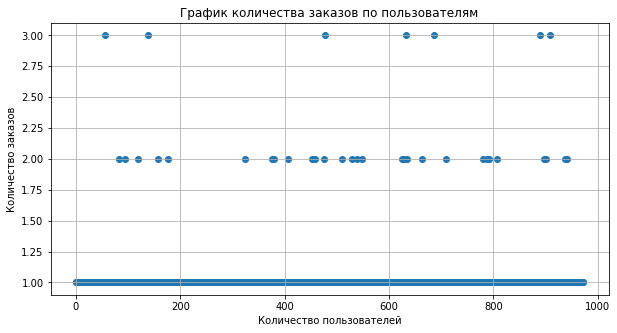

In [ ]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

# задаем размер
plt.figure(figsize=(10,5))

# строим график
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

# задаем параметры
plt.grid()
plt.title('График количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show()

Наибольшее количество пользователей делает количество заказов = 1, наименьшее = 3.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей

In [ ]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

95% пользователей делают 1 заказ, а 99% пользователей делают 2 заказа или меньше. Это означает, что большинство пользователей совершают небольшое количество заказов.

Выбор границы для определения аномальных пользователей зависит от целей и контекста проекта. В данном случае считаем корректным выбрать границу по 95 перцентилю, с целью минимизировать отнесение нормального пользователя к аномальному. Граница по количеству заказа = меньше 2.

### Построим точечный график стоимостей заказов

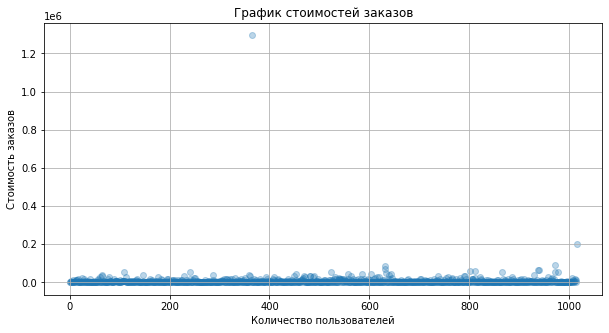

In [ ]:
# задаем размер
plt.figure(figsize=(10,5))

# строим график
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha=0.3)

# задаем параметры
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

Из-за выбросов график не является наглядным, создадим временный массив без аномалий и построим новый график. Нижняя аномалия находится на 0.2 в 1е6, что равняется 200 000, поэтому выберем все заказы, в которых стоимость меньше этого числа.

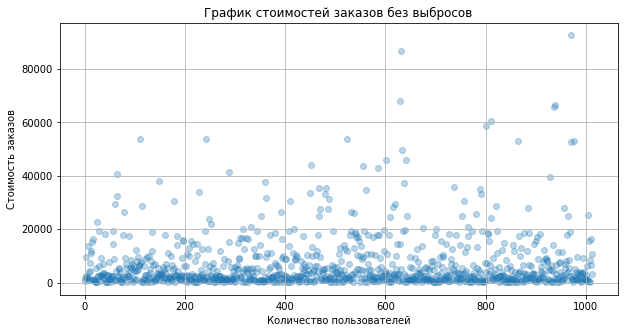

In [ ]:
good_orders = orders.query('revenue < 200000')

# задаем размер
plt.figure(figsize=(10,5))

# строим график
x_values = pd.Series(range(0,len(good_orders['revenue'])))
plt.scatter(x_values, good_orders['revenue'], alpha=0.3)

# задаем параметры
plt.grid()
plt.title('График стоимостей заказов без выбросов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

Большое число пользователей делает заказы стоимостью ниже 20 000 (наибольшее стремится к диапазону менее 10 000), однако есть нормально количество пользователей, стоимость заказов которых находится в между 20 000 и 40 000. Стоить также заметить, что были отброшены 2 заказа, стоимость которых выше 200 000, наибольший из которых стоит около 1.3 млн.

### Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

95% заказов имеют стоимость не выше 26 785, а 99% заказов - не выше 53 904.

Эти значения представляют собой границы, выше которых заказы могут считаться аномальными.

Выбор границы аномалий зависит от контекста проекта и бизнес-задач. В данном случае более важно выявить заказы, стоимость которых значительно превышает среднюю, то можно взять 95-й перцентиль (26 785) в качестве границы аномалий.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [ ]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

**Нулевая гипотеза:** различий в среднем количестве заказов между группами нет.

**Альтернативная гипотеза:** различия в среднем количестве заказов между группами есть.

Уровень статистической значимости: 0.05.

Тест (критерий) проверки гипотез: U-критерий Манна-Уитни.

In [ ]:
# print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

In [ ]:
# проводим статистический тест (U-критерий Манна-Уитни)
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
alpha = .05
# вычисляем различие в среднем количестве заказов
difference = sampleB.mean() / sampleA.mean() - 1

# выводим результаты
print(f"P-value: {p_value:.3f}")
print(f"Различие в среднем количестве заказов: {difference:.3f}")

# принимаем решение о нулевой гипотезе
if p_value < alpha:
    print("Нулевую гипотезу можно отвергнуть")
else:
    print("Нулевую гипотезу нельзя отвергнуть")

P-value: 0.011
Различие в среднем количестве заказов: 0.160
Нулевую гипотезу можно отвергнуть


Вывод: По «сырым» данным различия в среднем числе заказов групп A и B есть.

Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 16% — второе число в выводе.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

**Нулевая гипотеза:** различий в среднем чеке между группами нет.

**Альтернативная гипотеза:** различия в среднем чеке между группами есть.

Уровень статистической значимости: 0.05.

Тест (критерий) проверки гипотез: U-критерий Манна-Уитни.

In [ ]:
# print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
# print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

# проводим статистический тест (U-критерий Манна-Уитни)
p_value_revenue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

# вычисляем различие в средней выручке
difference_revenue = orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1

# выводим результаты
print(f"P-value (выручка): {p_value_revenue:.3f}")
print(f"Различие в среднем чеке: {difference_revenue:.3f}")

# принимаем решение о нулевой гипотезе
if p_value_revenue < alpha:
    print("Нулевую гипотезу можно отвергнуть")
else:
    print("Нулевую гипотезу нельзя отвергнуть")


P-value (выручка): 0.829
Различие в среднем чеке: 0.287
Нулевую гипотезу нельзя отвергнуть


Вывод: По «сырым» данным различий в среднем чеке заказа между группами A и B нет.

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B выше среднего чека группы A.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

По количеству заказов 95% пользователей оплачивают 1 заказ, а 99% пользователей 2 или менее.

По стоимости заказов 95% - 26 785, а 99% - 53 904.

На основании этих данных аномальными будем считать:
- количество заказов больше 1 (5%)
- стоимость заказов больше 30 000 (1-5%)

In [ ]:
# узнаем, сколько всего аномальных пользователей атрибутом shape.

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
Name: visitor_id, dtype: int64
77


77 аномальных значений - это не маленькое количество.

In [ ]:
# подготовим выборки количества заказов по пользователям по группам теста:

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [ ]:
# применим статистический критерий Манна-Уитни к полученным выборкам:
# print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
# print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

# проводим статистический тест (U-критерий Манна-Уитни)
p_value_filtered = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

# вычисляем различие в среднем количестве заказов с учетом фильтрации
difference_filtered = sampleBFiltered.mean() / sampleAFiltered.mean() - 1

# выводим результаты
print(f"P-value (фильтрованные данные): {p_value_filtered:.3f}")
print(f"Различие в среднем количестве заказов (фильтрованные данные): {difference_filtered:.3f}")

# принимаем решение о нулевой гипотезе для фильтрованных данных
if p_value_filtered < alpha:
    print("Нулевую гипотезу также можно отвергнуть")
else:
    print("Нулевую гипотезу также нельзя отвергнуть")


P-value (фильтрованные данные): 0.013
Различие в среднем количестве заказов (фильтрованные данные): 0.180
Нулевую гипотезу также можно отвергнуть


Результаты по среднему количеству заказов в "сырых" и "обработанных" данных практически не изменились.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [ ]:
# Проводим статистический тест (U-критерий Манна-Уитни) с учетом фильтрации
p_value_revenue_filtered = stats.mannwhitneyu(
    orders[
        np.logical_and(
            orders['group'] == 'A',
            np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
        )
    ]['revenue'],
    orders[
        np.logical_and(
            orders['group'] == 'B',
            np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
        )
    ]['revenue'],
)[1]

# Вычисляем различие в средней выручке с учетом фильтрации
difference_revenue_filtered = (
    orders[
        np.logical_and(
            orders['group'] == 'B',
            np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
        )
    ]['revenue'].mean()
    / orders[
        np.logical_and(
            orders['group'] == 'A',
            np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
        )
    ]['revenue'].mean()
    - 1
)

# Выводим результаты
print(f"P-value (фильтрованные данные): {p_value_revenue_filtered:.3f}")
print(f"Различие в среднем чеке (фильтрованные данные): {difference_revenue_filtered:.3f}")

# Принимаем решение о нулевой гипотезе для фильтрованных данных
if p_value_revenue_filtered < alpha:
    print("Нулевую гипотезу также можно отвергнуть")
else:
    print("Нулевую гипотезу также нельзя отвергнуть")


P-value (фильтрованные данные): 0.829
Различие в среднем чеке (фильтрованные данные): -0.011
Нулевую гипотезу также нельзя отвергнуть


P-value не изменился, однако средний чек группы В стал ниже на 29 процентных пунктов.

### Примем решение по результатам теста
Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Промежуточные выводы, влияющие на принятие решения:
- Есть статистически значимое различие по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий, в числе заказов группа В выигрывает;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- В целом по всем графикам у группы В наблюдается выигрыш и прирост относительно группы А.

На основании анализа рекомендуется остановить тест и зафиксировать победу группы В. Несмотря на то, что средний чек не показал статистически значимых изменений, увеличение среднего количества заказов в группе B может существенно повлиять на общую выручку. Таким образом, можно считать, что цель теста — увеличение выручки — была достигнута.

## Общий вывод

В рамках данного проекта мы стояли перед задачей увеличения выручки интернет-магазина. Мы провели анализ гипотез и запустили A/B-тест для проверки эффективности выбранных изменений. В файле по заказам (`orders`) 1197 строк, пропуски и дубликаты отсутствуют. В файле `visitors` с информацией по участникам теста 62 строки, также отсутствуют пропуски и дубликаты. Для дальнейшей работы были изменены названия столбцов, формат даты.

**Промежуточные выводы**

1. Приоритизация гипотез:
   - Гипотезы с высокими оценками ICE (8, 0, 7) считаются наиболее приоритетными. Оценка RICE также подтвердила приоритет гипотезы 7. Гипотеза с индексом 7 звучит следующим образом: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.


2. Анализ A/B-теста:
   - График кумулятивной выручки показал, что группа B начала выигрывать с 13 августа. Резкое увеличение выручки в группе B произошло 18 августа.
   - Кумулятивный средний чек группы B резко возрос после 18 августа, превысив средний чек группы A.
   - График относительного изменения кумулятивного среднего чека указывает на наличие выбросов в данных.
   - Среднее количество заказов на посетителя сначала превышало в группе A, но после 6 августа ситуация изменилась в пользу группы B.
   - График относительного изменения среднего количества заказов также указывает на наличие выбросов.
   - Большинство пользователей совершает 1 заказ, что подтверждается 95-м и 99-м перцентилями.

**Рекомендации для отдела маркетинга**

1. Продолжить мониторинг выручки и среднего чека для более точного понимания долгосрочного влияния изменений.

2. Обратить внимание на аномалии, особенно в контексте заказов большой стоимости.

3. Пересмотреть гипотезу 7, так как она имеет высший приоритет согласно фреймворку RICE, рекомендуется более детальное рассмотрение и возможная реализация.

4. На основании анализа рекомендуется остановить тест и зафиксировать победу группы В. Несмотря на то, что средний чек не показал статистически значимых изменений, увеличение среднего количества заказов в группе B может существенно повлиять на общую выручку. Таким образом, можно считать, что цель теста — увеличение выручки — была достигнута.